In [55]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [50]:
# Load the IPL dataset
ipl = pd.read_csv('ipl_history.csv')

# Display the first 5 rows of the dataset
ipl.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [38]:
# Dropping irrelevant columns
df = ipl.drop(['mid', 'date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker'], axis=1)

# Display the first 5 rows of the updated DataFrame
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [39]:
# Define features (X) and target variable (y)
X = df.drop(['total'], axis=1)
y = df['total']

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = batsman_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# Display the first 5 rows of the updated DataFrame
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,328,201
1,14,6,12,61,201
2,14,6,12,61,201
3,14,6,12,61,201
4,14,6,12,61,201


In [41]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (53209, 5)
X_test shape: (22805, 5)
y_train shape: (53209,)
y_test shape: (22805,)


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training and testing sets to verify
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

print(X_train_scaled)

X_train_scaled shape: (53209, 5)
X_test_scaled shape: (22805, 5)
[[0.44117647 0.92307692 0.         0.1902439  0.36890244]
 [0.64705882 0.15384615 0.30769231 0.95853659 0.14634146]
 [0.41176471 0.92307692 1.         0.93658537 0.53353659]
 ...
 [0.02941176 0.53846154 0.         0.5195122  0.55792683]
 [0.44117647 0.         0.53846154 0.62926829 0.83841463]
 [0.41176471 0.92307692 0.         0.93658537 0.5152439 ]]


In [43]:
input_dimension = X_train_scaled.shape[1]

# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=512, activation="relu", input_dim=input_dimension))
nn_model.add(tf.keras.layers.Dense(units=256, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
nn_model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression

c:\Users\abids\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

In [ ]:
model_losses = pd.DataFrame(nn_model.history.history)
model_losses.plot()

In [ ]:
# Make predictions
predictions = nn_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

In [ ]:
# Saving model
nn_model.save('ipl_predict.h5')

In [ ]:
# Define your variables
venue = ...
batting_team = ...
bowling_team = ...
striker = ...
bowler = ...

# Store the variables
%store venue
%store batting_team
%store bowling_team
%store striker
%store bowler
%store df
%store venue_encoder
%store batting_team_encoder
%store bowling_team_encoder
%store batsman_encoder
%store bowler_encoder
%store scaler


# Linear Regression Model 

In [45]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled,y_train)

LinearRegression()

In [46]:
# Make predictions using the X test
predictions_lin= lin_model.predict(X_test_scaled)

In [52]:
predictions_lin

array([157.72324131, 162.52651515, 160.69407495, ..., 158.70266628,
       162.04786855, 162.09079778])

In [60]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predictions_lin), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predictions_lin), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predictions_lin), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predictions_lin), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predictions_lin), 2))

Mean absolute error = 22.68
Mean squared error = 839.56
Median absolute error = 19.47
Explain variance score = 0.0
R2 score = 0.0


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# define dataset
# define the model
rf_model = RandomForestClassifier()
# fit the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [57]:
# Make predictions using the X test
predictions_rf = rf_model.predict(X_test_scaled)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_rf)

print(f"Accuracy Score : {acc_score}")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predictions_rf), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predictions_rf), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predictions_rf), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predictions_rf), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predictions_rf), 2))

Accuracy Score : 0.9479500109625082
Mean absolute error = 1.57
Mean squared error = 77.26
Median absolute error = 0.0
Explain variance score = 0.91
R2 score = 0.91


Feature:  0 , Score: 0.24753640578252087
Feature:  1 , Score: 0.15780081359593204
Feature:  2 , Score: 0.19521635959889974
Feature:  3 , Score: 0.19519723776670725
Feature:  4 , Score: 0.20424918325594002


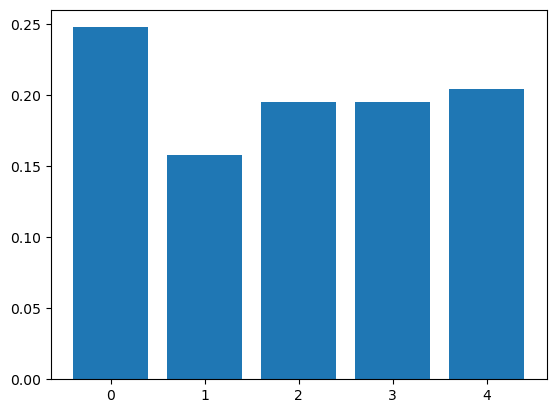

In [61]:
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ',i, ', Score:', v)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()